In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from data_explr import DataExploration

In [2]:
## Read the Data
df=pd.read_csv('../data/nbl_eval.csv')
dexp=DataExploration()

In [3]:
df.source=df.source.astype('category').cat.codes
df.destination=df.destination.astype('category').cat.codes

### Visualising Pairs Of Continous Data

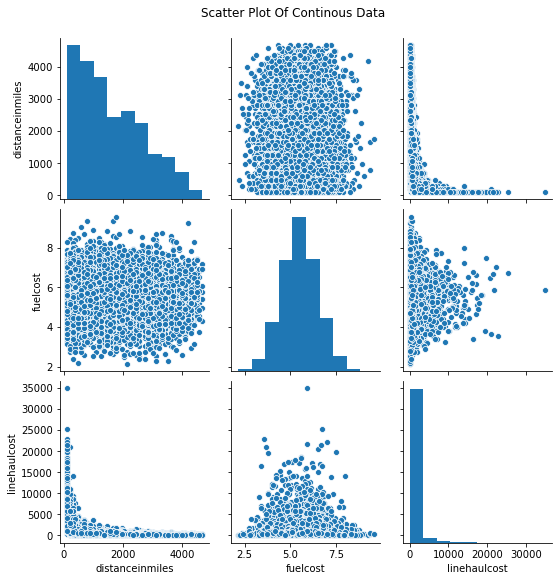

In [4]:
columns=["distanceinmiles","fuelcost","linehaulcost"]
g = sns.pairplot(df[columns],palette="Accent")
g.fig.suptitle("Scatter Plot Of Continous Data",y=1.05)
plt.show()

### Visualization of Categorical Feature and Continous Feature

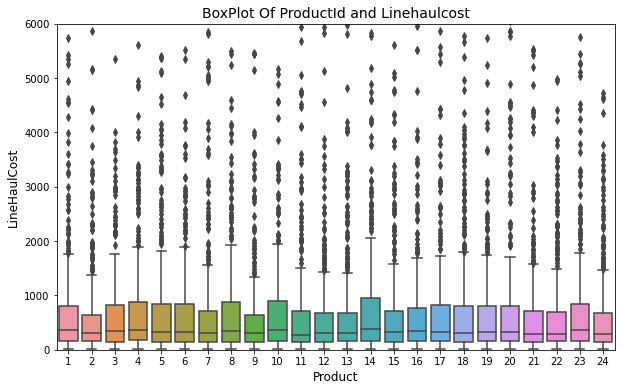

In [5]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df, x='productid',y='linehaulcost')
plt.ylim([0,6000])
plt.title("BoxPlot Of ProductId and Linehaulcost",fontsize=14)
plt.ylabel("LineHaulCost",fontsize=12)
plt.xlabel("Product",fontsize=12)
plt.show()

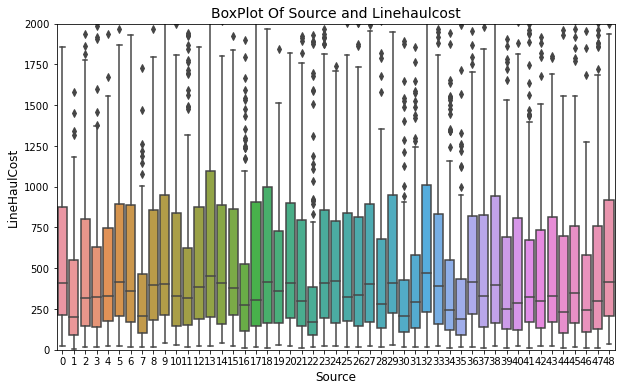

In [6]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df, x='source',y='linehaulcost')
plt.ylim([0,2000])
plt.title("BoxPlot Of Source and Linehaulcost",fontsize=14)
plt.ylabel("LineHaulCost",fontsize=12)
plt.xlabel("Source",fontsize=12)
plt.show()

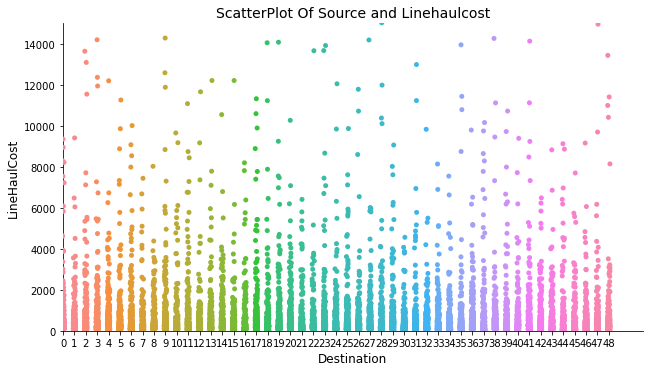

In [7]:
sns.catplot(x='destination',y='linehaulcost',data=df,height=5, aspect=10/5.5)
plt.ylim([0,15000])
plt.xlim([0,51])
plt.title("ScatterPlot Of Source and Linehaulcost",fontsize=14)
plt.ylabel("LineHaulCost",fontsize=12)
plt.xlabel("Destination",fontsize=12)
plt.show()

### Measure Relationship Between Pair Of Categorical Features

In [30]:
columns=['source','destination','productid','truckingcompanyid']
df_chi=dexp.rel_cat_chisquare(df,columns)
df_chi

,Categorical_1,Categorical_2,Test_Statistic,P-Value,Statis_Signf,Pval_Signf
0,source,destination,2541.448329,0.000344,Reject H0,Reject H0
1,source,productid,1106.655404,0.471838,Fail to Reject H0,Fail to Reject H0
2,source,truckingcompanyid,295228.066482,0.534878,Fail to Reject H0,Fail to Reject H0
3,destination,productid,1199.582653,0.023168,Reject H0,Reject H0
4,destination,truckingcompanyid,295346.730802,0.473340,Fail to Reject H0,Fail to Reject H0
5,productid,truckingcompanyid,141183.681907,0.721155,Fail to Reject H0,Fail to Reject H0


## Collinearity Check

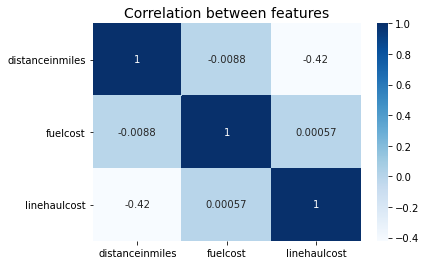

In [29]:
columns=["distanceinmiles","fuelcost","linehaulcost"]
#plt.figure(figsize=[10,6])
sns.heatmap(df[columns].corr(),annot=True,cmap='Blues')
plt.title("Correlation between features",fontsize=14)
plt.show()

### MultiCollinearity Check Using Variance Inflation Factor

In [11]:
features =df.columns
# get y and X dataframes based on this regression:
y, X = dmatrices('linehaulcost ~truckingcompanyid+productid+distanceinmiles+fuelcost+source+destination', 
                 df, return_type='dataframe')

In [12]:
#calculate VIF for each explanatory variable
dexp.calculate_vif(X)

,VIF,variable
0,47.375467,Intercept
1,1.000196,truckingcompanyid
2,1.000321,productid
3,1.006481,distanceinmiles
4,1.000265,fuelcost
5,1.002854,source
6,1.004062,destination
